/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


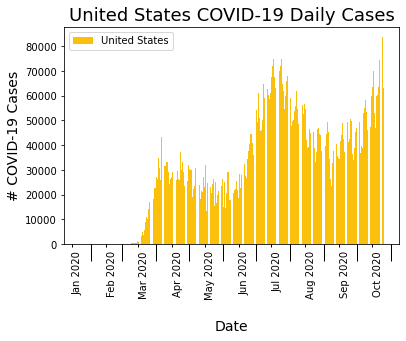

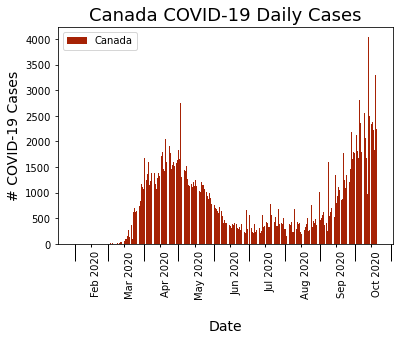

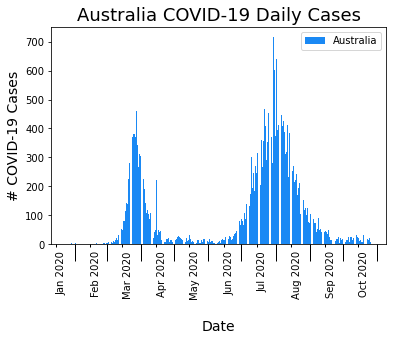

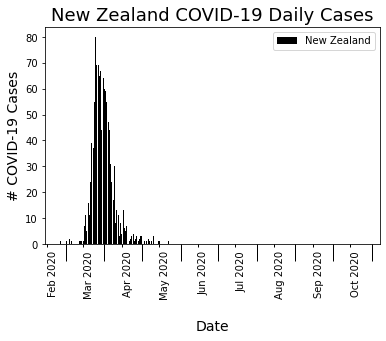

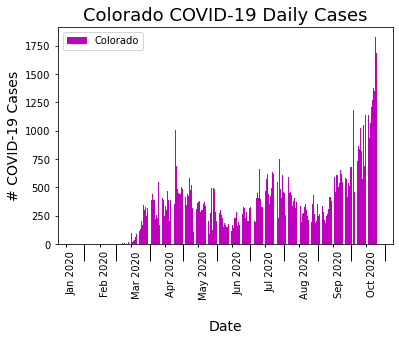

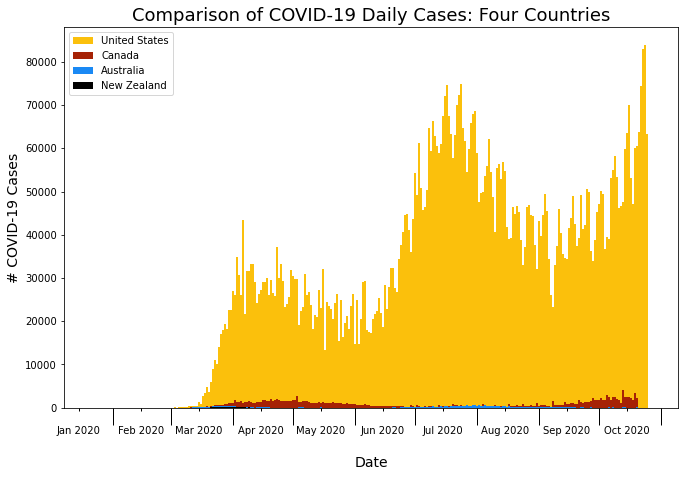

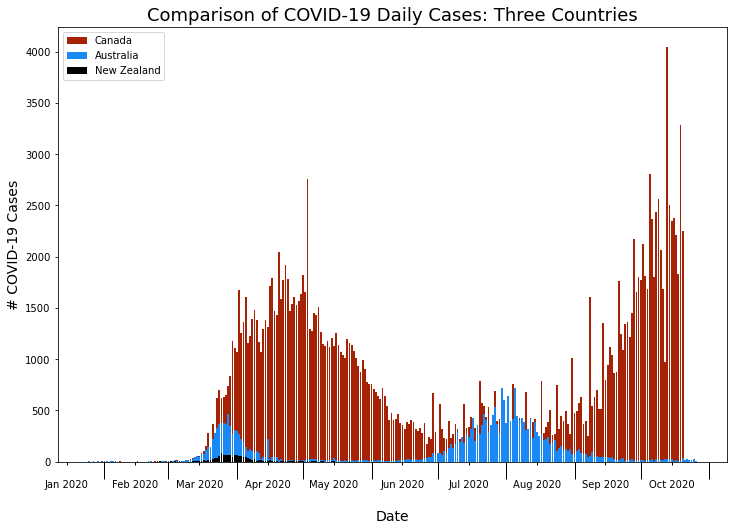

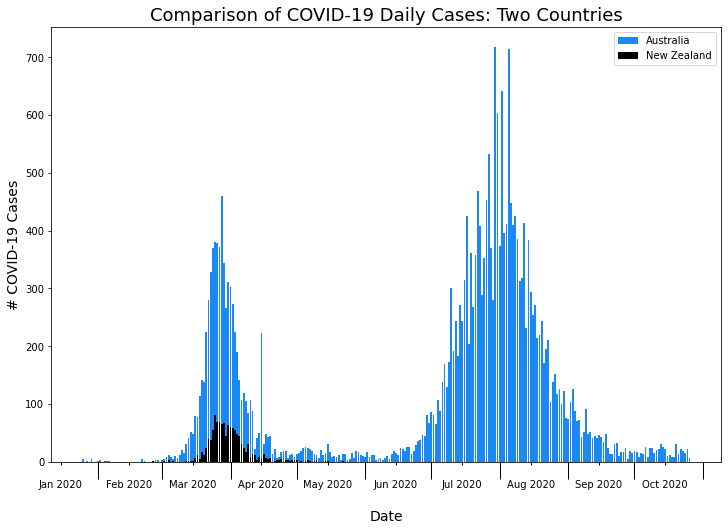

In [ ]:
from data_munging import *
from plotting import *
from dataframe_testing import *
from analysis import *
import scipy.stats as stats
import numpy as np

In [ ]:
us_total = covid_merge_two_week['US_Daily_Totals'].sum()
us_total_prop = covid_merge_two_week['US_Daily_prop'].sum()
can_total = covid_merge_two_week['Canada_Daily_Cases'].sum()
can_total_prop = covid_merge_two_week['Canada_Daily_prop'].sum()
aus_total = covid_merge_two_week['Aus_Daily_Cases'].sum()
aus_total_prop = covid_merge_two_week['Aus_Daily_prop'].sum()
nz_total = covid_merge_two_week['NZ_Daily_Cases'].sum()
nz_total_prop = covid_merge_two_week['NZ_Daily_prop'].sum()

print(us_total, 
us_total_prop)
print(can_total ,can_total_prop)
print(aus_total,aus_total_prop)
print(nz_total ,nz_total_prop )

In [ ]:
us_mean_prop = np.mean(deaths_merge['US_Daily_prop'])
can_mean_prop = np.mean(deaths_merge['Canada_Daily_prop'])
aus_mean_prop = np.mean(deaths_merge['Aus_Daily_prop'])
nz_mean_prop = np.mean(deaths_merge['NZ_Daily_prop'])

print(us_mean_prop, can_mean_prop, aus_mean_prop, nz_mean_prop)


In [ ]:
# us_mean = np.mean(deaths_merge['US_Daily_Deaths'])
# can_mean = np.mean(deaths_merge['Canada_Daily_Deaths'])
# aus_mean = np.mean(deaths_merge['Aus_Daily_Deaths'])
# nz_mean = np.mean(deaths_merge['NZ_Daily_Deaths'])
# u_var = np.var(deaths_merge['US_Daily_Deaths'])
# c_var = np.var(deaths_merge['Canada_Daily_Deaths'])
# a_var = np.var(deaths_merge['Aus_Daily_Deaths'])
# n_var = np.var(deaths_merge['NZ_Daily_Deaths'])
# u_norm = stats.norm(us_mean, np.sqrt(u_var/us_sample))
# c_norm = stats.norm(can_mean, np.sqrt(c_var/can_sample))
# a_norm = stats.norm(aus_mean, np.sqrt(a_var/aus_sample))
# n_norm = stats.norm(nz_mean, np.sqrt(n_var/nz_sample))

In [ ]:
sample_total = int((us_pop + aus_pop + can_pop + nz_pop)*100000)
print(sample_total)

In [ ]:
us_sample = us_total_prop
can_sample = can_total_prop
aus_sample = aus_total_prop
nz_sample = nz_total_prop  
#calculate sample variances
us_var = np.var(deaths_merge['US_Daily_prop'])
can_var = np.var(deaths_merge['Canada_Daily_prop'])
aus_var = np.var(deaths_merge['Aus_Daily_prop'])
nz_var = np.var(deaths_merge['NZ_Daily_prop'])
# print(us_sample, can_sample, aus_sample, nz_sample)
# print(us_var, can_var, aus_var, nz_var)

In [ ]:
us_norm_dist = stats.norm(us_mean_prop, np.sqrt(us_var/us_sample))
can_norm_dist = stats.norm(can_mean_prop, np.sqrt(can_var/can_sample))
aus_norm_dist = stats.norm(aus_mean_prop, np.sqrt(aus_var/aus_sample))
nz_norm_dist = stats.norm(nz_mean_prop, np.sqrt(nz_var/nz_sample))

In [ ]:
x = np.linspace(-0.03, 0.27, num=250)
fig, ax = plt.subplots()
ax.plot(x, us_norm_dist.pdf(x), color='#FBC00C')
ax.plot(x, can_norm_dist.pdf(x), color='#A62205')
ax.plot(x, aus_norm_dist.pdf(x), color='#1A89F4')
ax.plot(x, nz_norm_dist.pdf(x), color='black');
# ax.plot(x, ha_dist.pdf(x), color='m');

In [ ]:
h0_dist = stats.norm(us_mean_prop, np.sqrt(us_var/us_sample))
ha_dist = stats.norm((us_mean_prop/2), np.sqrt(us_var/us_sample))
x = np.linspace(.05, 0.27, num=250)
fig, ax = plt.subplots()
ax.plot(x, h0_dist.pdf(x), color='#FBC00C')
ax.plot(x, ha_dist.pdf(x), color='#A62205');


In [ ]:
us_stat, us_pvalue = stats.ttest_ind(deaths_merge['US_Daily_prop'], deaths_merge['Canada_Daily_prop'],
equal_var=False)
print(us_stat, us_pvalue)

In [ ]:
stat, p_value = stats.ttest_ind(deaths_merge['Canada_Daily_prop'], deaths_merge['US_Daily_prop'])
p_value

In [ ]:
us_stat, us_pvalue = stats.ttest_ind_from_stats(us_mean_prop, np.sqrt(us_var/us_sample), us_sample, can_mean_prop, np.sqrt(can_var/can_sample), can_sample, equal_var=True)
us_stat, us_pvalue

In [ ]:
us_total_death = deaths_merge['US_Daily_Deaths'].sum()
us_total_prop_death = deaths_merge['US_Daily_prop'].sum()
can_total_death = deaths_merge['Canada_Daily_Deaths'].sum()
can_total_prop_death = deaths_merge['Canada_Daily_prop'].sum()
aus_total_death = deaths_merge['Aus_Daily_Deaths'].sum()
aus_total_prop_death = deaths_merge['Aus_Daily_prop'].sum()
nz_total_death = deaths_merge['NZ_Daily_Deaths'].sum()
nz_total_prop_death = deaths_merge['NZ_Daily_prop'].sum()

print(us_total_death, us_total_prop_death, can_total_death,
      can_total_prop_death,aus_total_death, aus_total_prop_death,
     nz_total_death, nz_total_prop_death)

In [ ]:
covid_merge.head()

In [ ]:
covid_merge_two_week = covid_merge.iloc[0:265, :]


In [ ]:
us_total

In [ ]:
us_p = us_total_prop_death / us_total_prop
can_p = can_total_prop_death / can_total_prop
aus_p = aus_total_prop_death / aus_total_prop
nz_p = nz_total_prop_death / nz_total_prop
print(us_p, can_p, aus_p, nz_p)

In [ ]:
mu = 0
p = (us_total_prop_death + can_total_prop_death) / (us_total_prop+can_total_prop)
std = np.sqrt(((us_total_prop+can_total_prop)*p*(1-p))/(us_total_prop*can_total_prop))
diff_norm = stats.norm(0, std)

In [ ]:
fig, ax = plt.subplots()
x=np.linspace(-.25, 0.25, num=250)
ax.plot(x, diff_norm.pdf(x));

In [ ]:
diff = can_p - us_p
p_value = 1 - diff_norm.cdf(diff)
diff, p_value

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(-0.3, 0.3, num=250)
ax.plot(x, diff_norm.pdf(x), linewidth=3)
ax.fill_between(x, diff_norm.pdf(x), where=(x >= diff),
                color="red", alpha=0.5)

ax.set_title("p-value Reigon")


In [ ]:
def freq_plot(c1_dist, c1_clr, c1_label, c2_dist, c2_clr, c2_label, c3_dist, c3_clr, c3_label, 
c4_dist, c4_clr, c4_label, ax, title, x_label, y_label, x):
    '''Inputs: c1_dist, c2_dist, c3_dist, c4_dist - countries' normal approximated distribution
               c1_clr, c2_clr, c3_clr, c4_clr - countries' color for line on plot (string)
               cl_label, c2_label, c3_label, c4_label - string label for country on plot
               ax - axes to put figure on
               title - string of title for plot
               x_label - string of label for x axis
               y_label - string of label for y axis
               x - numpy array to plot distributions over
        Plots a graph with all four countries' frequency distributions for comparison
        Output: plot'''
    ax.plot(x, c1_dist.pdf(x), color=c1_clr, label = c1_label, linewidth=1.5)
    ax.plot(x, c2_dist.pdf(x), color=c2_clr, label=c2_label, linewidth=1.5)
    ax.plot(x, c3_dist.pdf(x), color=c3_clr, label=c3_label, linewidth=1.5)
    ax.plot(x, c4_dist.pdf(x), color=c4_clr, label=c4_label, linewidth=1.5)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend()

In [ ]:
us_binom = stats.binom(us_total_prop, us_p)
can_binom = stats.binom(can_total_prop, can_p)
aus_binom = stats.binom(aus_total_prop, aus_p)
nz_binom = stats.binom(nz_total_prop, nz_p)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(-5, 90, num=250)
freq_plot(us_norm_dist, '#FBC00C', 'United States', can_norm_dist, '#A62205', 'Canada', aus_norm_dist, 
'#1A89F4', 'Australia', nz_norm_dist, 'black', 'New Zealand', ax, 
'Comparing Country Probability of Death due to COVID-19 Infection', 'Probability', 'Density', 
x=x)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 6))

x = np.linspace(-0.12, 0.12, num=250)
ax.plot(x, diff_norm_can_us.pdf(x), color='#A62205')
ax.plot(x, diff_norm_aus_us.pdf(x), color='#1A89F4')
ax.plot(x, diff_norm_nz_us.pdf(x), color='black')
ax.fill_between(x, diff_norm_can_us.pdf(x), where=(x >= diff_freq_can_us),
                color="red", alpha=0.7)
ax.fill_between(x, diff_norm_aus_us.pdf(x), where=(x >= diff_freq_aus_us),
                color="m", alpha=0.2)
ax.fill_between(x, diff_norm_nz_us.pdf(x), where=(x >= diff_freq_nz_us),
                color="blue", alpha=0.2);

In [ ]:
us_p, can_p, aus_p, nz_p

In [ ]:
print(diff_freq_can_us, p_value_can_us)
print(diff_freq_aus_us, p_value_aus_us)
print(diff_freq_nz_us, p_value_nz_us)

In [ ]:
sum_ = canada_covid['numtested'].sum()
prop_sum = sum_ / (37742154/100000)

In [ ]:
head = deaths_merge.iloc[50:56, :]
head.to_csv('../data/deaths_head.csv', index=True)